In [1]:
# Source - https://www.kaggle.com/montimirko/digit-recognition-with-cnn-0-99-accuracy

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

Using TensorFlow backend.


In [2]:
src=Path("./Source Data/")
train_src=src/'mnist_train.csv'
test_src=src/'mnist_test.csv'
# Should be able to use numpy.loadtxt to load these CSVs
df_train=pd.read_csv(train_src,header=None)
df_test=pd.read_csv(test_src,header=None)

In [3]:
# Structure of CSV is a single linear list of 1+784 normalized values for each 28X28 image where the 1st value is the label
# This cell strips the labels from the image data and stores in different variables
train_labels=df_train.iloc[:,0].values
train_set=df_train.drop(df_train.columns[0],axis=1).values
test_labels=df_test.iloc[:,0].values
test_set=df_test.drop(df_test.columns[0],axis=1).values

print(train_labels.shape,test_labels.shape)
print(train_set.shape,test_set.shape)

(60000,) (10000,)
(60000, 784) (10000, 784)


In [21]:
# Need to reshape the data as a 4D tensor form because Conv2D (the convolution layer from tensorflow) takes input as 4D tensor
train_set=np.reshape(train_set,(-1,28,28,1))
test_set=np.reshape(test_set,(-1,28,28,1))
train_labels=np.reshape(train_labels,(-1,1))
test_labels=np.reshape(test_labels,(-1,1))

print(train_set.shape,test_set.shape)
print(train_labels.shape,test_labels.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 1) (10000, 1)


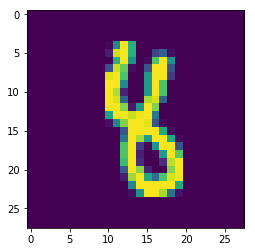

In [5]:
# To see any of the images use imshow
plt.imshow(train_set[7000].reshape([28,28]))

In [6]:
# Documentation for adding layers to the sequential model
# https://keras.io/getting-started/sequential-model-guide/
model=keras.models.Sequential([
    # doc on conv layer - https://keras.io/layers/convolutional/
    keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.BatchNormalization(),
    # doc to explain padding -https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t
    keras.layers.Conv2D(128, (3,3),padding='valid', activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3,3),padding='valid', activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax')    
])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# doc on categorical crossentropy - https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy
# Why sparse categorical crossentropy is better than normal categorical entropy -
# https://datascience.stackexchange.com/questions/41921/sparse-categorical-crossentropy-vs-categorical-crossentropy-keras-accuracy
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 13, 13, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 5, 5, 128)         512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         147584    
__________

In [22]:
#Xtrain,Xtest,Ytrain,Ytest=train_test_split(train_set,train_labels,test_size=0.2)
#print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape)

In [25]:
history=model.fit(train_set,train_labels,epochs=10)
# history stores the loss across the training epochs. 
# Ref - https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

Epoch 1/10
60000/60000 [==============================] - 203s 3ms/sample - loss: 0.0735 - acc: 0.9778
Epoch 2/10
60000/60000 [==============================] - 207s 3ms/sample - loss: 0.0533 - acc: 0.9836
Epoch 3/10
60000/60000 [==============================] - 210s 3ms/sample - loss: 0.0392 - acc: 0.9876
Epoch 4/10
60000/60000 [==============================] - 208s 3ms/sample - loss: 0.0323 - acc: 0.9900
Epoch 5/10
60000/60000 [==============================] - 209s 3ms/sample - loss: 0.0274 - acc: 0.9913
Epoch 6/10
60000/60000 [==============================] - 208s 3ms/sample - loss: 0.0240 - acc: 0.9924
Epoch 7/10
60000/60000 [==============================] - 208s 3ms/sample - loss: 0.0175 - acc: 0.9941
Epoch 8/10
60000/60000 [==============================] - 212s 4ms/sample - loss: 0.0171 - acc: 0.9945
Epoch 9/10
60000/60000 [==============================] - 209s 3ms/sample - loss: 0.0136 - acc: 0.9956
Epoch 10/10
60000/60000 [==============================] - 203s 3ms/sampl

In [26]:
model.evaluate(test_set,test_labels)

10000/10000 [==============================] - 14s 1ms/sample - loss: 0.0452 - acc: 0.9889


[0.04519553901469335, 0.9889]